In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
print(df.shape)

(200, 5)


In [ ]:
X = df.iloc[:,1:5]
X.head()

X['Genre'] = X['Genre']=='Male'


In [ ]:

from sklearn.cluster import KMeans

km = KMeans(
    n_clusters=5, init='random', max_iter=3000,  random_state=0
)

y = km.fit_predict(X)
print(y)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 2 3 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 0 1 2 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 2 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


[0 1 2 3 4]


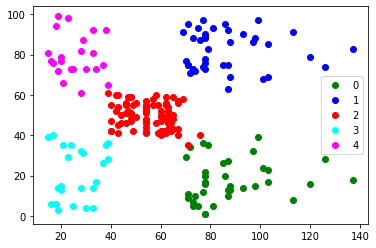

In [ ]:
#Getting unique labels
 
u_labels = np.unique(y)
X = X.values
print(u_labels)
#plotting the results:
c = ['g','b','r','cyan','magenta']

for i in u_labels:
    plt.scatter(X[y == i,2] , X[y == i,3],c=c[i],label=i)
plt.legend()
plt.show()

[0]


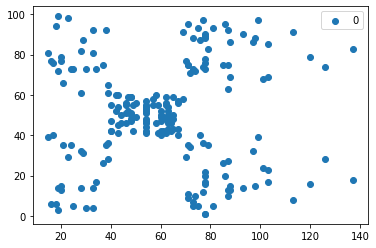

[0 1]


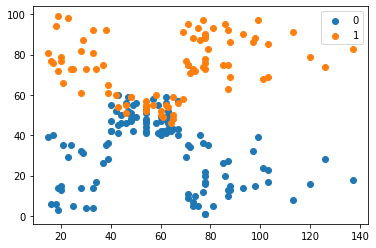

[0 1 2]


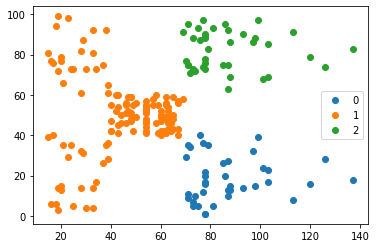

[0 1 2 3]


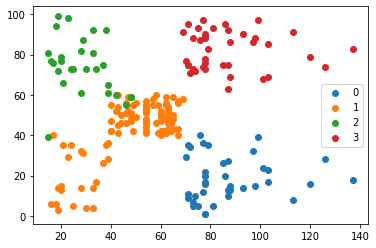

[0 1 2 3 4]


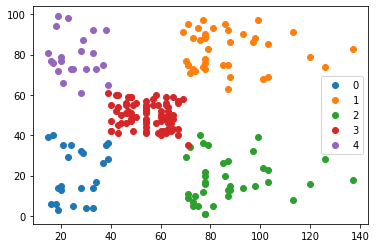

[0 1 2 3 4 5]


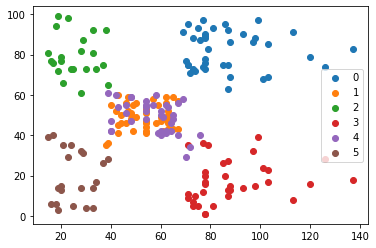

[0 1 2 3 4 5 6]


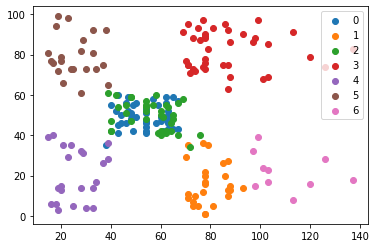

[0 1 2 3 4 5 6 7]


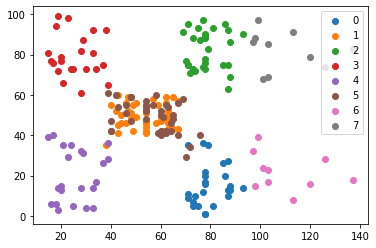

[0 1 2 3 4 5 6 7 8]


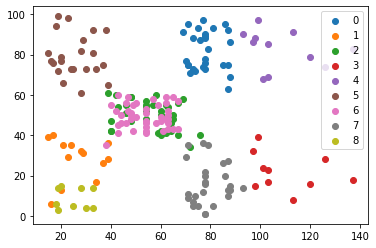

[0 1 2 3 4 5 6 7 8 9]


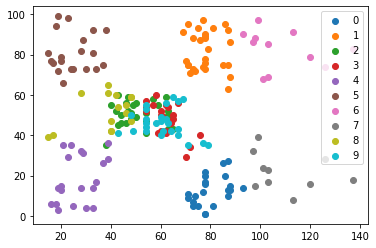

In [ ]:
from sklearn.cluster import KMeans
wcss = [] 
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X) 
    wcss.append(kmeans.inertia_)
    y = kmeans.predict(X)
    u_labels = np.unique(y)
    print(u_labels)
    #plotting the results:
    c = ['g','b','r','cyan','magenta']
    for j in u_labels:
      plt.scatter(X[y == j,2] , X[y == j,3],label=j)
    plt.legend()
    plt.show()

In [ ]:
print(wcss)

[308862.06000000006, 212889.44245524303, 143391.59236035676, 104414.67534220168, 75427.71182424155, 58348.641363315044, 51575.2779310779, 44359.634641148325, 40942.51117006117, 37515.84125504126]


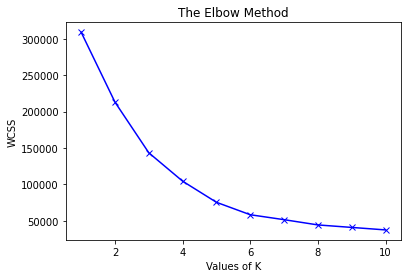

In [ ]:
plt.plot(range(1,11), wcss, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('WCSS')
plt.title('The Elbow Method')
plt.show()

#Agglomerative Clustering

In [ ]:
df = pd.read_csv("Mall_Customers.csv")
X = df.iloc[:,1:5]


X['Genre'] = X['Genre']=='Male'

In [ ]:
X.head()


,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,True,19,15,39
1,True,21,15,81
2,False,20,16,6
3,False,23,16,77
4,False,31,17,40


In [ ]:
from sklearn.preprocessing import normalize
X_scaled = normalize(X.iloc[:,1:])
X_scaled = pd.DataFrame(X_scaled, columns=X.iloc[:,1:].columns)
X_scaled.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,0.413925,0.326783,0.849635
1,0.247025,0.176446,0.952809
2,0.760286,0.608229,0.228086
3,0.280697,0.195267,0.939723
4,0.580683,0.318439,0.749269


In [ ]:
X_scaled['Gender'] = X['Genre']

In [ ]:
X_scaled.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender
0,0.413925,0.326783,0.849635,True
1,0.247025,0.176446,0.952809,True
2,0.760286,0.608229,0.228086,False
3,0.280697,0.195267,0.939723,False
4,0.580683,0.318439,0.749269,False


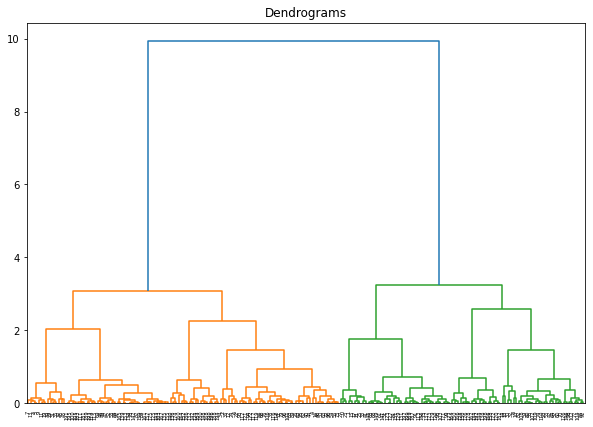

In [ ]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X_scaled, method='ward'))

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
cluster.fit_predict(X)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 0, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

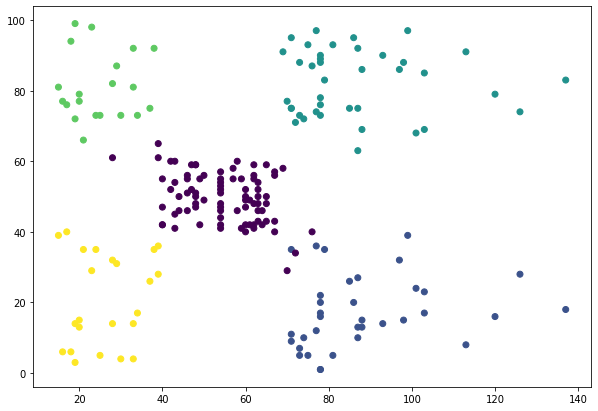

In [ ]:
plt.figure(figsize=(10, 7))  
plt.scatter(X.iloc[:,2], X.iloc[:,3], c=cluster.labels_) 